# Estudiante: Jason Solano Fonseca

In [1]:
import numpy as np
import pandas as pd
import sklearn
import pandas as pd
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
from pandas import Series
from matplotlib import pyplot


#Dataset: 

Attribute Information:

Input variables:
# bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

Para mas información: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [2]:

data = pd.read_excel("bankExcel.xlsx")

# Realizamos un prepocesamiento para limpiar los datos

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92893.0,-46.2,1313.0,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93994.0,-36.4,4855.0,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94465.0,-41.8,4962.0,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94465.0,-41.8,4959.0,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.2,-42.0,4191.0,5195.8,no


In [4]:
data.isnull().values.any()

False

# Sustituimos los datos categoricos

In [5]:
data.job.unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [6]:
data.job = data.job.replace({'unknown':0,'blue-collar':1,'services':2,'admin.':3,'entrepreneur':4,'self-employed':5
                             ,'technician':6,'management':7,'student':8,'retired':9,'housemaid':10,'unemployed':11})

In [7]:
data.job.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0])

In [8]:
data.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [9]:
data.marital = data.marital.replace({'unknown':0,'married':1,'single':2,'divorced':3})
data.marital.unique()

array([1, 2, 3, 0])

In [10]:
data.education.unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [11]:
data.education = data.education.replace({'unknown':0,'basic.4y':1,'basic.6y':2,'basic.9y':3,'high.school':4,
                                         'university.degree':5,'professional.course':6,'illiterate':7})


In [12]:
data.education.unique()

array([3, 4, 5, 6, 2, 1, 0, 7])

In [13]:
data.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [14]:
data.default = data.default.replace({"unknown":0,"no":1,"yes":2})
data.default.unique()

array([1, 0, 2])

In [15]:
data.housing.unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [16]:
data.housing = data.housing.replace({"unknown":0,"no":1,"yes":2})
data.housing.unique()

array([2, 1, 0])

In [17]:
data.loan.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [18]:
data.loan = data.loan.replace({"unknown":0,"no":1,"yes":2})
data.loan.unique()

array([1, 0, 2])

In [19]:
data.contact.unique()

array(['cellular', 'telephone'], dtype=object)

In [20]:
data.contact = data.contact.replace({'cellular':1,'telephone':2})
data.contact.unique()

array([1, 2])

In [21]:
data.month.unique()

array(['may', 'jun', 'nov', 'sep', 'jul', 'aug', 'mar', 'oct', 'apr',
       'dec'], dtype=object)

In [22]:
data.month = data.month.replace({'may':1,'jun':2,'nov':3,'sep':4,'jul':5,'aug':6,'mar':7,'oct':8,'apr':9,
                               'dec':10})
data.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [23]:
data.day_of_week.unique()

array(['fri', 'wed', 'mon', 'thu', 'tue'], dtype=object)

In [24]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [25]:
data.day_of_week = data.day_of_week.replace({'fri':1,'wed':2,'mon':3,'thu':4,'tue':5})
data.day_of_week.unique()

array([1, 2, 3, 4, 5])

In [26]:
data.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [27]:
data.poutcome = data.poutcome.replace({'nonexistent':0,'failure':1,'success':2})
data.poutcome.unique()

array([0, 1, 2])

In [28]:
data['nr.employed'].unique()

array([5099.1, 5191. , 5228.1, 5195.8, 4963.6, 5008.7, 5076.2, 4991.6,
       5017.5, 5023.5, 5176.3])

In [29]:
data.y.unique()

array(['no', 'yes'], dtype=object)

In [30]:
data.y = data.y.replace({'no':0,'yes':1})
data.y.unique()

array([0, 1])

In [31]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,3,1,2,1,1,1,1,...,2,999,0,0,-1.8,92893.0,-46.2,1313.0,5099.1,0
1,39,2,2,4,1,1,1,2,1,1,...,4,999,0,0,1.1,93994.0,-36.4,4855.0,5191.0,0
2,25,2,1,4,1,2,1,2,2,2,...,1,999,0,0,1.4,94465.0,-41.8,4962.0,5228.1,0
3,38,2,1,3,1,0,0,2,2,1,...,3,999,0,0,1.4,94465.0,-41.8,4959.0,5228.1,0
4,47,3,1,5,1,2,1,1,3,3,...,1,999,0,0,-0.1,93.2,-42.0,4191.0,5195.8,0


In [32]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,3,1,2,1,2,2,1,5,4,...,1,999,0,0,1.4,93918.0,-42.7,4958.00,5228.1,0
4115,39,3,1,4,1,2,1,2,5,1,...,1,999,0,0,1.4,93918.0,-42.7,4959.00,5228.1,0
4116,27,8,2,4,1,1,1,1,1,3,...,2,999,1,1,-1.8,92893.0,-46.2,1354.00,5099.1,0
4117,58,3,1,4,1,1,1,1,6,1,...,1,999,0,0,1.4,93444.0,-36.1,4966.00,5228.1,0
4118,34,7,2,4,1,2,1,1,3,2,...,1,999,0,0,-0.1,93.2,-42.0,4.12,5195.8,0


# Se realiza un balance de los datos del dataset, con 451 datos para fraudes y no fraudes

In [33]:
fraud = data[(data['y'] == 0)]
notFraud = data[data['y']==1]

newFraudDataSet = fraud.sample(451)
balancedDataSet = pd.concat([newFraudDataSet, notFraud])
balancedDataSet.shape

(902, 21)

In [36]:
values = balancedDataSet.values
values = values[:,:20]
values.shape

(902, 20)

In [38]:
scalar = MinMaxScaler(feature_range=(0, 1))
scalar = scalar.fit(values)
normalizeData = scalar.transform(values)
normalizeData

array([[5.00000000e-01, 2.72727273e-01, 3.33333333e-01, ...,
        6.15062762e-01, 9.98993430e-01, 1.00000000e+00],
       [2.50000000e-01, 9.09090909e-02, 3.33333333e-01, ...,
        6.02510460e-01, 9.77654149e-01, 8.59735350e-01],
       [3.97058824e-01, 2.72727273e-01, 3.33333333e-01, ...,
        6.02510460e-01, 9.77654149e-01, 8.59735350e-01],
       ...,
       [6.17647059e-01, 2.72727273e-01, 3.33333333e-01, ...,
        1.92468619e-01, 2.72451290e-01, 5.12287335e-01],
       [4.26470588e-01, 6.36363636e-01, 3.33333333e-01, ...,
        8.78661088e-01, 2.73787008e-05, 2.03780718e-01],
       [1.02941176e-01, 2.72727273e-01, 6.66666667e-01, ...,
        1.00000000e+00, 2.09366535e-05, 2.03780718e-01]])

# Se normaliza los datos balanceados
Se comprueba la normalización de los datos por medio de la graficación

In [39]:
def plotColumn(column):
    serie = pd.Series(column)
    serie.hist()
    pyplot.show()
    

In [ ]:
balancedDataSet.columns[:-1]

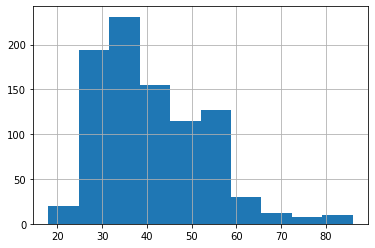

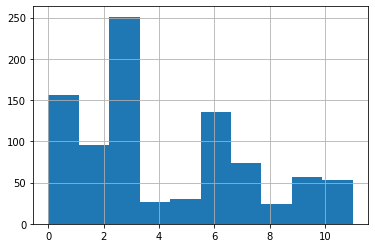

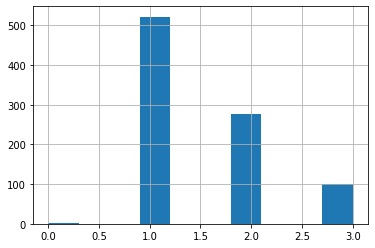

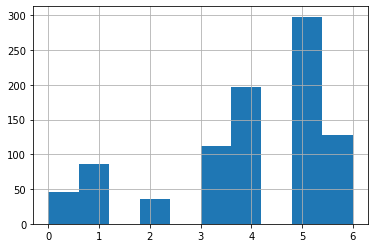

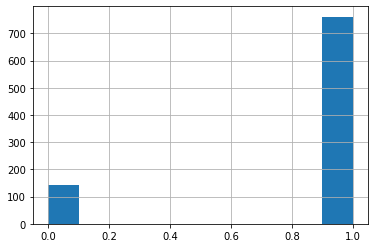

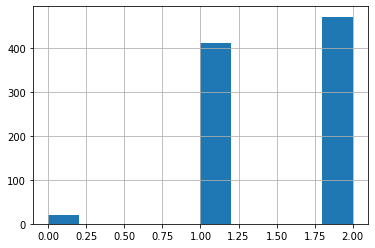

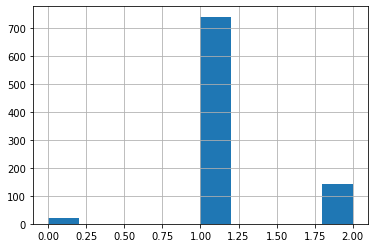

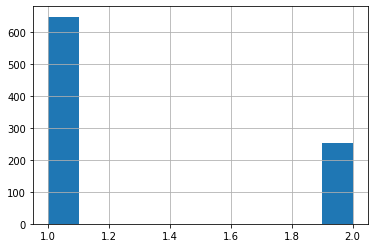

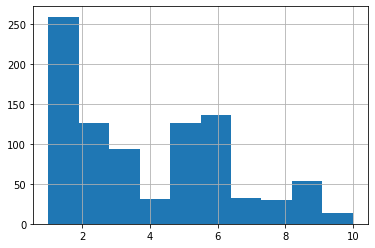

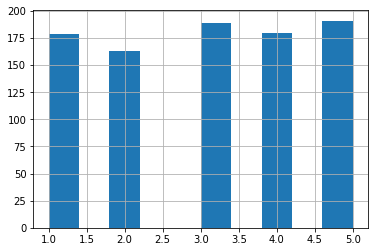

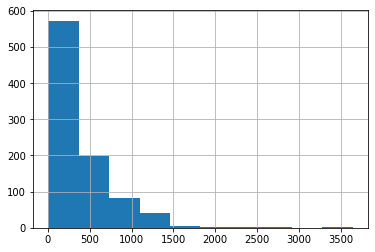

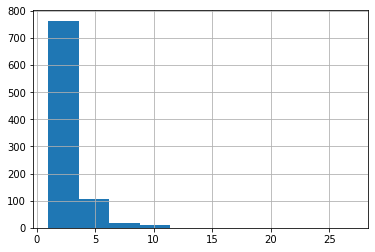

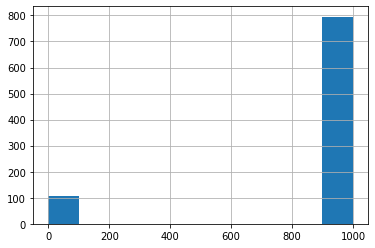

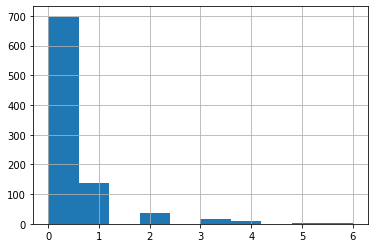

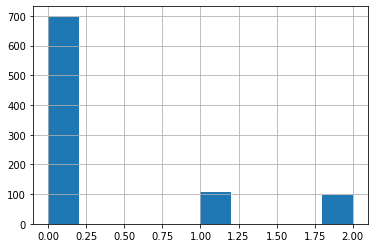

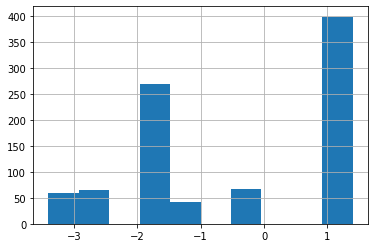

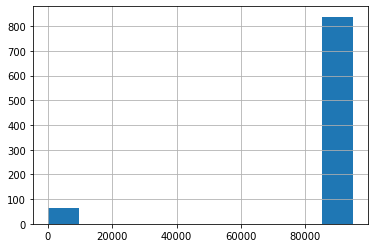

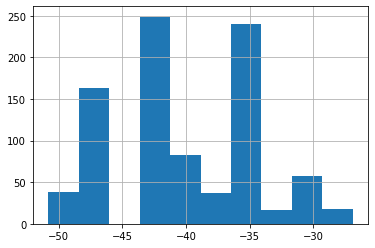

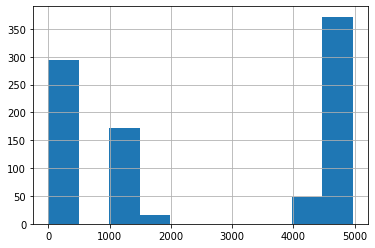

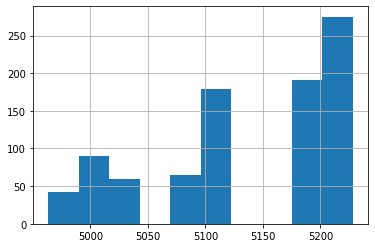

In [40]:
for i in balancedDataSet.columns[:20]:
    plotColumn(balancedDataSet[i])

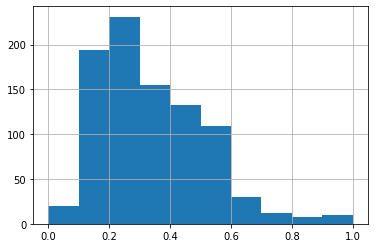

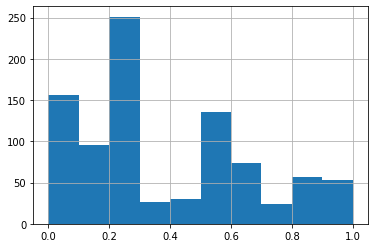

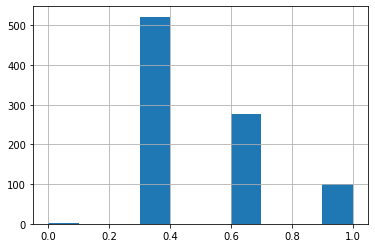

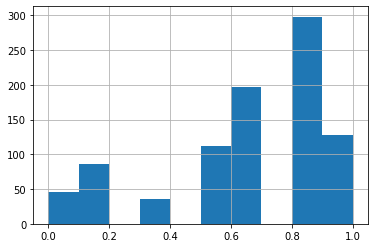

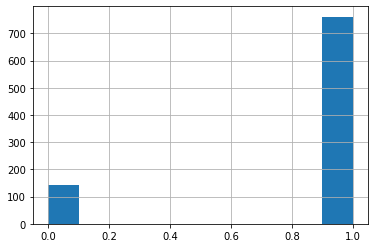

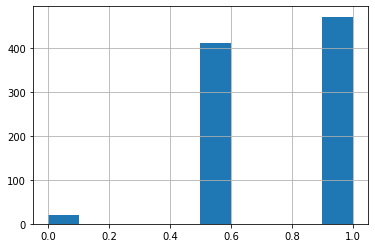

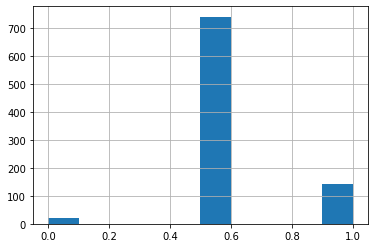

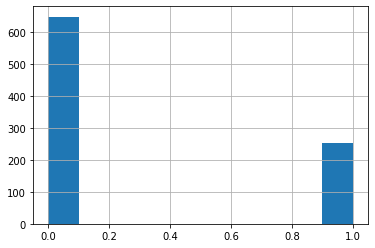

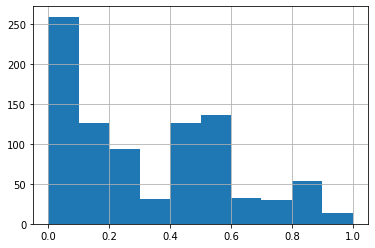

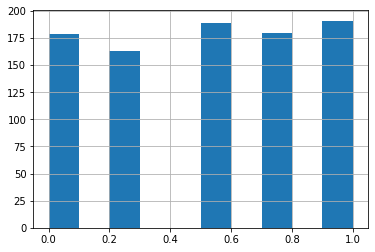

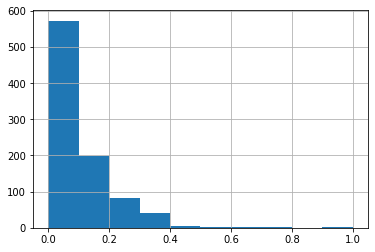

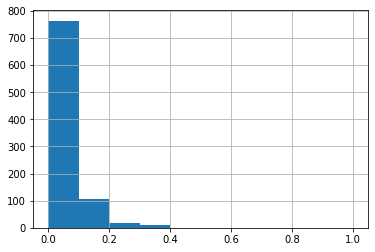

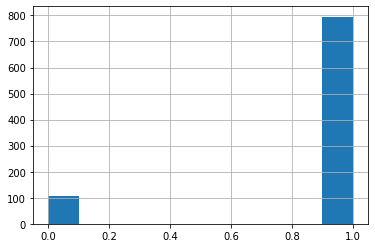

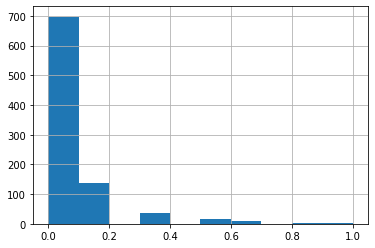

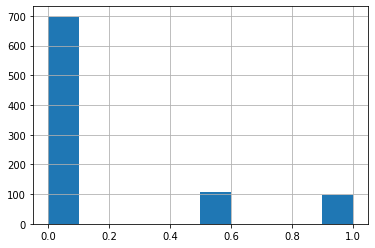

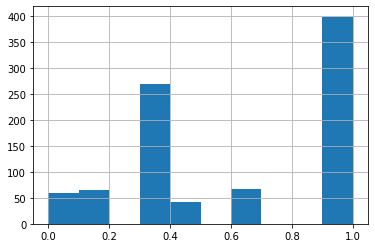

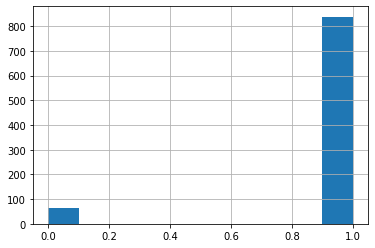

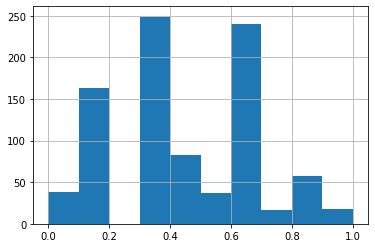

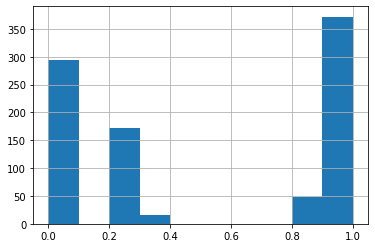

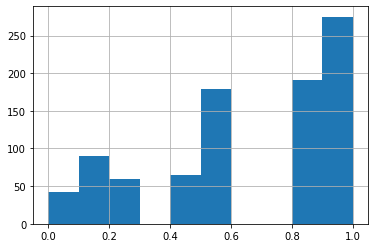

In [42]:
for i in normalizeData.transpose():
    plotColumn(i)

In [47]:
normalizeData.shape

(902, 20)

In [50]:
labels,features = balancedDataSet['y'],normalizeData

In [51]:
labels

2489    0
1091    0
3135    0
2392    0
3439    0
1880    0
1613    0
2081    0
3443    0
180     0
845     0
4072    0
2898    0
4084    0
131     0
649     0
757     0
2543    0
1271    0
301     0
3305    0
2849    0
1037    0
1462    0
3011    0
3524    0
2079    0
46      0
3615    0
2889    0
       ..
3799    1
3808    1
3813    1
3817    1
3823    1
3829    1
3862    1
3863    1
3865    1
3879    1
3889    1
3897    1
3937    1
3939    1
3943    1
3944    1
3945    1
3946    1
3949    1
3960    1
3969    1
3980    1
3992    1
3998    1
4031    1
4034    1
4066    1
4069    1
4088    1
4089    1
Name: y, Length: 902, dtype: int64

# Selecciones de columnas mas relevantes

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [53]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.15,random_state=13)

In [54]:
print(X_train.shape,y_test.shape)

(766, 20) (136,)


# Se aplica el Random Forest para obtener las columnas mas relevantes

In [55]:
from sklearn.ensemble import RandomForestClassifier
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500, max_depth= None, random_state=10)
RandomForestModel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [56]:
y_predict = RandomForestModel.predict(X_test)
rf = accuracy_score(y_test,y_predict)
rf

0.8676470588235294

In [57]:
importances = pd.DataFrame({'feature' : balancedDataSet.columns[:-1], 'importance':RandomForestModel.feature_importances_})

In [58]:
importances = importances.sort_values('importance', ascending = False).set_index('feature')

In [59]:
importances 

,importance
feature,
duration,0.415396
nr.employed,0.133853
euribor3m,0.105560
emp.var.rate,0.076144
cons.conf.idx,0.048116
month,0.033003
age,0.029585
pdays,0.023181
poutcome,0.019500


Al usar el random forest de una forma preliminar podemos ver cuales son los features mas importantes, a continuacion utilizaremos varios algoritmos de clasificacion con las primeras once features.

In [60]:
temp = list()
listC = ['duration','nr.employed','euribor3m','emp.var.rate','month','age','cons.conf.idx','pdays','poutcome','cons.price.idx','job','y']
for i in range(len(balancedDataSet.columns)):
    if balancedDataSet.columns[i] in listC:
        print(balancedDataSet.columns[i],i)
        temp.append(i)
temp

age 0
job 1
month 8
duration 10
pdays 12
poutcome 14
emp.var.rate 15
cons.price.idx 16
cons.conf.idx 17
euribor3m 18
nr.employed 19
y 20


[0, 1, 8, 10, 12, 14, 15, 16, 17, 18, 19, 20]

# Se realiza un nuevo dataset con las columnas mas relevantes

In [61]:
filterDataSet =  balancedDataSet.iloc[:,temp]
filterDataSet

,age,job,month,duration,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2489,52,3,6,331,999,0,1.4,93444.0,-36.1,4963.000,5228.1,0
1091,35,1,1,39,999,0,1.1,93994.0,-36.4,4857.000,5191.0,0
3135,45,3,1,134,999,0,1.1,93994.0,-36.4,4857.000,5191.0,0
2392,58,7,6,164,999,0,1.4,93444.0,-36.1,4965.000,5228.1,0
3439,41,5,2,178,999,0,1.4,94465.0,-41.8,4961.000,5228.1,0
1880,34,2,5,29,999,0,1.4,93918.0,-42.7,4961.000,5228.1,0
1613,46,3,1,56,999,0,1.1,93994.0,-36.4,4.860,5191.0,0
2081,28,2,5,363,999,0,1.4,93918.0,-42.7,4963.000,5228.1,0
3443,46,2,1,222,999,0,-1.8,92893.0,-46.2,1334.000,5099.1,0
180,34,7,2,192,999,0,-2.9,92963.0,-40.8,1.260,5076.2,0


# Se vuelven a normalizar los datos con el nuevo dataset

In [62]:
values = filterDataSet.values
values = values[:,:10]

scalar = MinMaxScaler(feature_range=(0, 1))
scalar = scalar.fit(values)
filterNormalizeData = scalar.transform(values)
filterNormalizeData

array([[5.00000000e-01, 2.72727273e-01, 5.55555556e-01, ...,
        9.86025701e-01, 6.15062762e-01, 9.98993430e-01],
       [2.50000000e-01, 9.09090909e-02, 0.00000000e+00, ...,
        9.91835122e-01, 6.02510460e-01, 9.77654149e-01],
       [3.97058824e-01, 2.72727273e-01, 0.00000000e+00, ...,
        9.91835122e-01, 6.02510460e-01, 9.77654149e-01],
       ...,
       [6.17647059e-01, 2.72727273e-01, 0.00000000e+00, ...,
        9.80205717e-01, 1.92468619e-01, 2.72451290e-01],
       [4.26470588e-01, 6.36363636e-01, 3.33333333e-01, ...,
        9.74776549e-01, 8.78661088e-01, 2.73787008e-05],
       [1.02941176e-01, 2.72727273e-01, 7.77777778e-01, ...,
        9.75325803e-01, 1.00000000e+00, 2.09366535e-05]])

# Se escogen los tres algoritmos vistos en la clase 4

# Separar data de entrenamiento y testeo

In [68]:
labels,features = balancedDataSet['y'],filterNormalizeData
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.15,random_state=13)

# Aplicación con KNeighbors

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
clf = KNeighborsClassifier(n_neighbors=7)

In [82]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

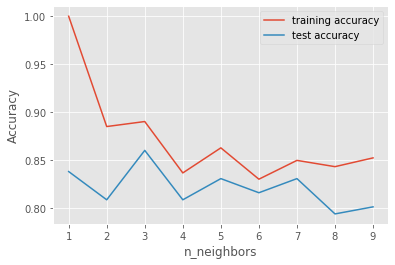

In [79]:
training_accuracy = []
test_accuracy = []
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

neighbors_settings = range(1,10)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

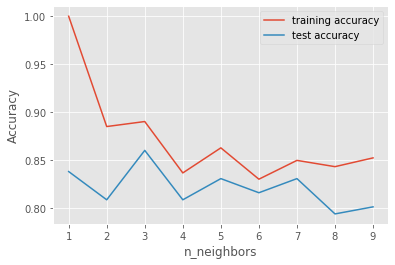

In [85]:
training_accuracy = []
test_accuracy = []
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

neighbors_settings = range(1,10)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(algorithm='brute',n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# Conclusión
De acuerdo a los graficos el hyperparametro n_neighbors presenta un mejor performance en la cantidad de 5, también se prueba el hyperparametro algorithm con el algoritmo: brute, el cual se puede apreciar el mismo performance

# Aplicación de Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

In [100]:
lrc = LogisticRegression(multi_class='ovr')
lrc.fit(X_train, y_train)


In [98]:
trainingScore = lrc.score(X_train, y_train)
testScore = lrc.score(X_test, y_test)
print(trainingScore,testScore)

0.8368146214099217 0.875


In [121]:
from sklearn.model_selection import GridSearchCV
dual = [True,False]
fit_intercept = [True,False]
max_iter =[100,120,140,160,180,200]
Cs = range(1,10)




/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

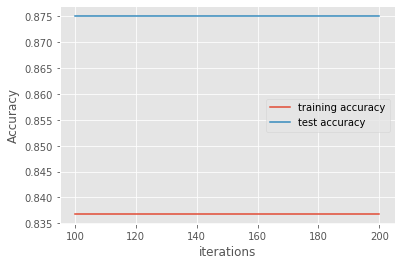

In [122]:
training_accuracy = []
test_accuracy = []
for n_max_iter in max_iter:
    # se construye el modelo de clasificacion
    lrc = LogisticRegression(multi_class='ovr',max_iter=n_max_iter)
    lrc.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(lrc.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(lrc.score(X_test, y_test))
plt.plot(max_iter, training_accuracy, label="training accuracy")
plt.plot(max_iter, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("iterations")
plt.legend()    


/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

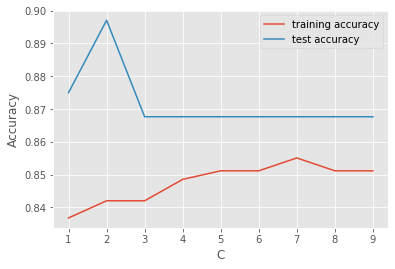

In [123]:
training_accuracy = []
test_accuracy = []
for n_C in Cs:
    # se construye el modelo de clasificacion
    lrc = LogisticRegression(multi_class='ovr',C=float(n_C))
    lrc.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(lrc.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(lrc.score(X_test, y_test))
plt.plot(Cs, training_accuracy, label="training accuracy")
plt.plot(Cs, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend() 

# Conclusion
En el caso de logistic Regression se escogen dos hyperparametros los cuales son numero de iteraciones y $C$, en el primer grafico podemos evaluar que de 100 a 200 iteraciones el performance del algoritmo no cambia. Por otra parte en el caso del hyperparametro $C$ significativo en el caso del trainning Accuracy, por lo cual la optimizacion del algoritmo queda en $C = 7$ y num_itr = 100

# Implementacion de un SVM

In [124]:
from sklearn.svm import SVC

In [125]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.75
Accuracy on test set: 0.79


In [126]:
svc.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
Cs = range(1,10)

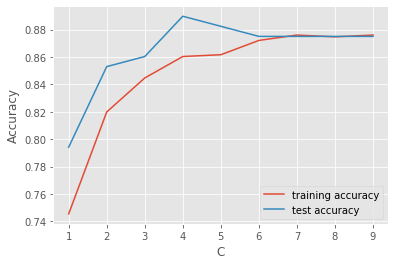

In [128]:
training_accuracy = []
test_accuracy = []
for n_C in Cs:
    # se construye el modelo de clasificacion
    svc = SVC(gamma='auto',C=n_C)
    svc.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(svc.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(svc.score(X_test, y_test))
plt.plot(Cs, training_accuracy, label="training accuracy")
plt.plot(Cs, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend() 

In [133]:
gammaList = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

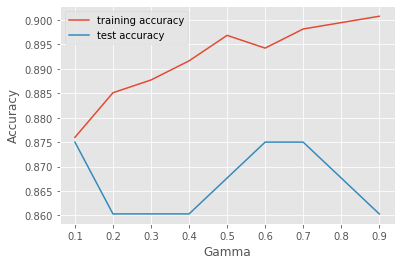

In [134]:
training_accuracy = []
test_accuracy = []
for n_gamma in gammaList:
    # se construye el modelo de clasificacion
    svc = SVC(gamma=n_gamma,C=7)
    svc.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(svc.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(svc.score(X_test, y_test))
plt.plot(gammaList, training_accuracy, label="training accuracy")
plt.plot(gammaList, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Gamma")
plt.legend()

# Conclusión
    Para el caso del algoritmo Support Vectors Machine, se prueban los hyperparametros: $\gamma$ y $C$, en los cuales se pueden observar, en el primer grafico se puedo ver que $C=7$, es muy buen resultado para el accuracy de test y training, por otra parte manteniendo ese mismo hyperparametro pero alterando $\gamma$ $0.6$ permite el mejor rendimiento en conjunto de los accuracy training and test

# Método de Ensamblaje

# Voting Classifier
La idea detrás de VotingClassifier es combinar clasificadores conceptualmente diferentes de machine learning y usar un voto mayoritario o las probabilidades pronosticadas promedio 



In [139]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [142]:
clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = LogisticRegression(multi_class='ovr',C=7.0)
clf3 = svc = SVC(gamma=0.6,C=7)
eclf = VotingClassifier(estimators=[('kn', clf1), ('lf', clf2), ('svc', clf3)], voting='hard')

En este caos se pueden observar las predicciones de los tres modelos usados anteriormente, y los utilizamos con el modelo VotingClassifier

In [154]:
for clf, label in zip([clf1, clf2, clf3, eclf], ['K Neighbors', 'Logistic Regression', 'SVC', 'Ensemble']):
    clf.fit(X_train, y_train)
    print(label)
    print("Training:\n","Accuracy:",clf.score(X_train, y_train))
    print("Test:\n","Accuracy:",clf.score(X_test, y_test))
    

K Neighbors
Training:
 Accuracy: 0.8629242819843342
Test:
 Accuracy: 0.8308823529411765
Logistic Regression
Training:
 Accuracy: 0.8550913838120104
Test:
 Accuracy: 0.8676470588235294
SVC
Training:
 Accuracy: 0.8942558746736292
Test:
 Accuracy: 0.875
Ensemble
Training:
 Accuracy: 0.8877284595300261
Test:
 Accuracy: 0.8676470588235294


/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Para este caso utilizamos unos pesos diferntes, segun la documentacion de sckit-learn el peso por default es de [1,1,1], se han probado diferentes combinaciones donde no se logra un mejor performance que el anterior

In [178]:
eclf = VotingClassifier(estimators=[('kn', clf1), ('lf', clf2), ('svc', clf3)],weights=[0,1,0])
eclf.fit(X_train, y_train)
print("Training:\n","Accuracy:",eclf.score(X_train, y_train))
print("Test:\n","Accuracy:",eclf.score(X_test, y_test))

Training:
 Accuracy: 0.8550913838120104
Test:
 Accuracy: 0.8676470588235294


/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [179]:
eclf = VotingClassifier(estimators=[('kn', clf1), ('lf', clf2), ('svc', clf3)],weights=[2,1,2])
eclf.fit(X_train, y_train)
print("Training:\n","Accuracy:",eclf.score(X_train, y_train))
print("Test:\n","Accuracy:",eclf.score(X_test, y_test))

Training:
 Accuracy: 0.8877284595300261
Test:
 Accuracy: 0.8676470588235294


/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Definición de Metodos de ensamble

El objetivo de los métodos de ensamblaje es combinar las predicciones de varios estimadores básicos construidos con un algoritmo de aprendizaje dado para mejorar la generalización / robustez sobre un solo estimador.